     Electronics  Clothing  Home & Kitchen  Sports
Jan         4378      3609            3630    1263
Feb         1106      1128            3617    5000
Mar         1742      3046            2415    1659
Apr         1477      2765            3687    4172
May         1919      2081            2999    4892
Jun         4990      4992            3439    2210
Jul         4797      1513            3579    2001
Aug         2752      2587            3497    4824
Sep         4481      3146            4788    3112
Oct         3771      3790            4598    2208
Nov         1896      4512            4750    1359
Dec         4160      1242            2920    1782


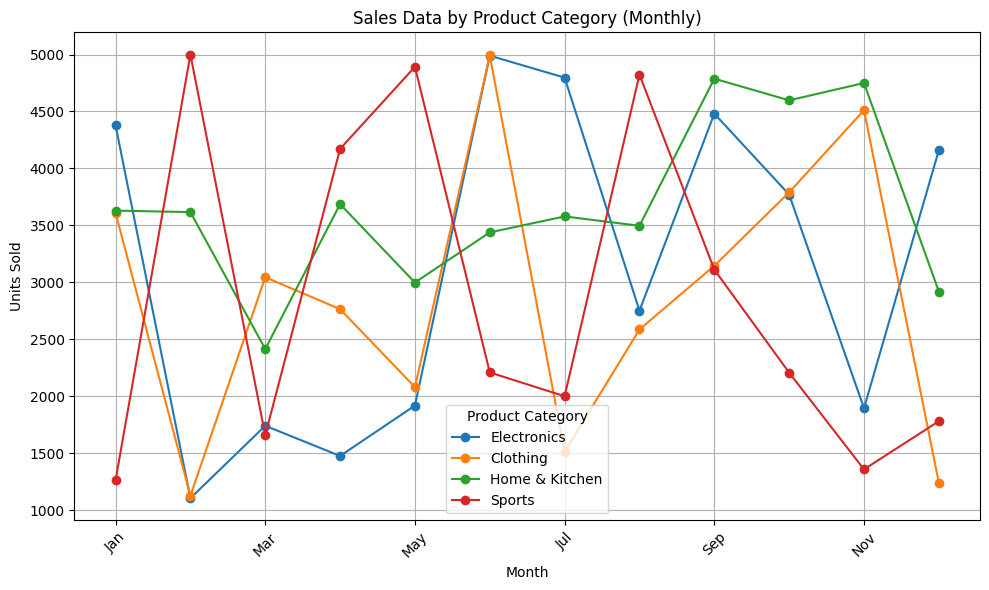

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Initialize Random Seed using the roll number
np.random.seed(102317173)
#Generate a 12x4 array where each row represents a month and each column represents a product category, ales values are between 1000 and 5000 units per month
sales_data = np.random.randint(1000, 5001, size=(12, 4))

# Create a DataFrame with appropriate column names and index for months
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
product_categories = ['Electronics', 'Clothing', 'Home & Kitchen', 'Sports']
df_sales = pd.DataFrame(sales_data, columns=product_categories, index=months)
print(df_sales)

#Plotting the data for visualization
df_sales.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Sales Data by Product Category (Monthly)')
plt.xlabel('Month')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.legend(title='Product Category')
plt.grid(True)
plt.tight_layout()
plt.show()


First 5 rows of sales data:
     Electronics  Clothing  Home & Kitchen  Sports
Jan         4378      3609            3630    1263
Feb         1106      1128            3617    5000
Mar         1742      3046            2415    1659
Apr         1477      2765            3687    4172
May         1919      2081            2999    4892

Summary statistics of sales data:
       Electronics     Clothing  Home & Kitchen       Sports
count    12.000000    12.000000       12.000000    12.000000
mean   3122.416667  2867.583333     3659.916667  2873.500000
std    1445.367991  1240.919121      736.102940  1456.707402
min    1106.000000  1128.000000     2415.000000  1263.000000
25%    1857.500000  1939.000000     3329.000000  1751.250000
50%    3261.500000  2905.500000     3598.000000  2209.000000
75%    4403.750000  3654.250000     3914.750000  4335.000000
max    4990.000000  4992.000000     4788.000000  5000.000000

Total sales per category:
Electronics       37469
Clothing          34411
Home & 

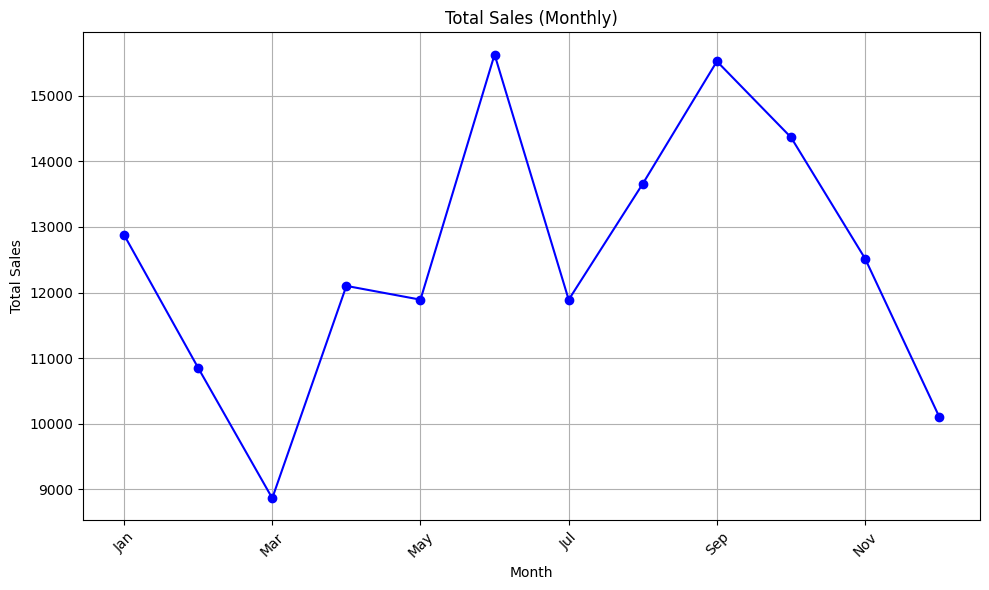

In [3]:
# Display the first 5 rows and summary statistics of the DataFrame.
print("First 5 rows of sales data:")
print(df_sales.head())
print("\nSummary statistics of sales data:")
print(df_sales.describe())
# Calculate the total sales per category and total sales per month.
total_sales_per_category = df_sales.sum(axis=0)
total_sales_per_month = df_sales.sum(axis=1)

print("\nTotal sales per category:")
print(total_sales_per_category)
print("\nTotal sales per month:")
print(total_sales_per_month)

# Calculate the average sales growth between consecutive months for each category.
sales_growth = df_sales.pct_change().mean() * 100
print("\nAverage sales growth between consecutive months for each category:")
print(sales_growth)

#Add the columns to the DataFrame:Total Sales: Sum of all categories per month; Growth Rate: Percentage change in Total Sales from the previous month.
df_sales['Total Sales'] = df_sales.sum(axis=1)
df_sales['Growth Rate'] = df_sales['Total Sales'].pct_change() * 100

#Apply a randomized discount:
roll_number = 102317173
if roll_number % 2 == 0:
    df_sales['Electronics'] *= 0.9  # Apply 10% discount
else:
    df_sales['Clothing'] *= 0.85  # Apply 15% discount

# Display the final DataFrame after applying the changes
print("\nDataFrame after adding columns and applying discount:")
print(df_sales)

# Plot the Total Sales over the months
df_sales['Total Sales'].plot(kind='line', marker='o', figsize=(10, 6), color='blue')
plt.title('Total Sales (Monthly)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


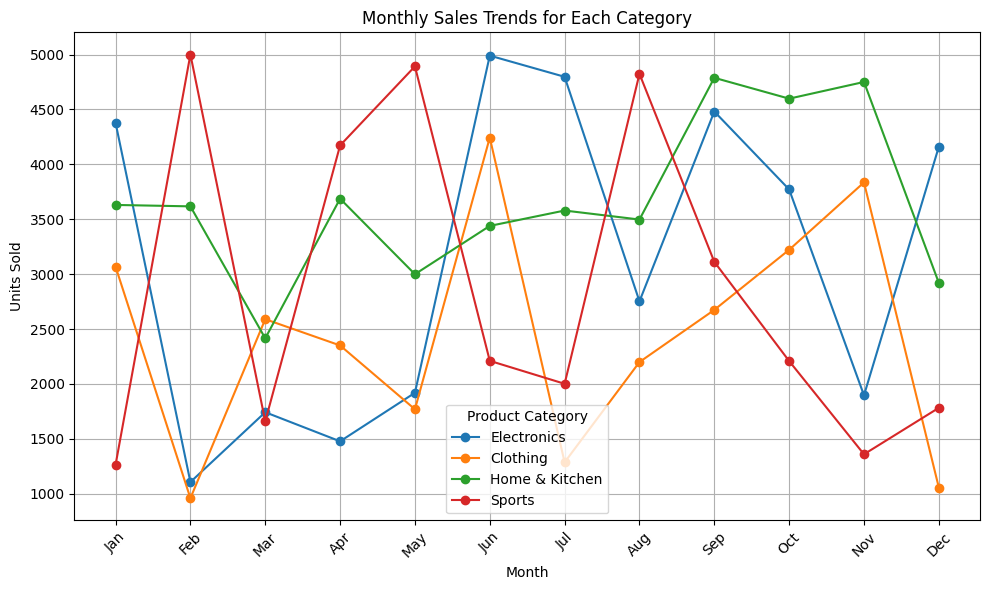

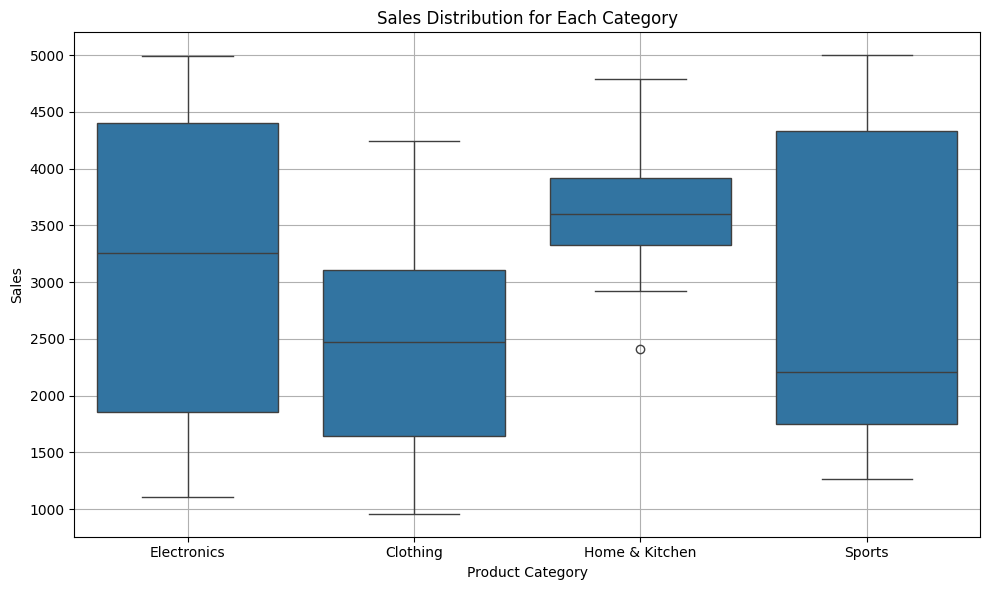

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
for category in df_sales.columns[:-2]:  # Exclude 'Total Sales' and 'Growth Rate'
    plt.plot(df_sales.index, df_sales[category], marker='o', label=category)
plt.title('Monthly Sales Trends for Each Category')
plt.xlabel('Month')
plt.ylabel('Units Sold')
plt.legend(title='Product Category')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Reshaping the DataFrame for box plot (long format)
df_sales_melted = df_sales.drop(columns=['Total Sales', 'Growth Rate']).reset_index().melt(id_vars='index', value_vars=df_sales.columns[:-2], var_name='Category', value_name='Sales')
df_sales_melted = df_sales_melted.rename(columns={'index': 'Month'})
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Sales', data=df_sales_melted)
plt.title('Sales Distribution for Each Category')
plt.xlabel('Product Category')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.show()
